# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [4]:
# Iris_dataset
data = pd.read_csv("https://docs.google.com/spreadsheets/d/1-oHbsUX6XNiuNJUD06VVHtP2uYY3ySC0g32r1cwn6pM/export?gid=2062556584&format=csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

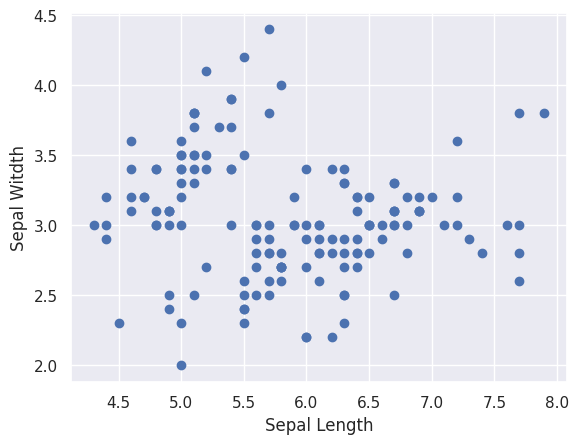

In [5]:
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Witdth')
plt.show();

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [8]:
kmeans = KMeans(2, n_init='auto')
x = data.copy()
kmeans.fit(x)

KMeans(n_clusters=2, n_init='auto')

In [10]:
clusters = x.copy()
clusters['cluster_preds'] = kmeans.fit_predict(x)
clusters.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_preds
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


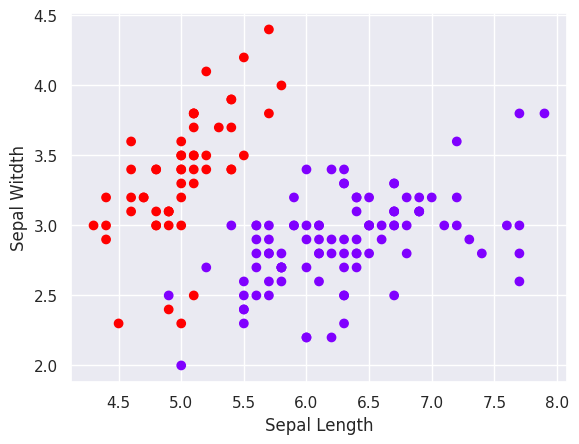

In [11]:
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c=clusters['cluster_preds'], cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Witdth')
plt.show();

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [13]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x)
x_scaled = scale.transform(x)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Clustering (scaled data)

In [14]:
kmeans_scaled = KMeans(2, n_init='auto')
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2, n_init='auto')

In [15]:
clusters_scaled = data.copy()
clusters_scaled['cluster_preds'] = kmeans.fit_predict(x_scaled)
clusters_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_preds
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


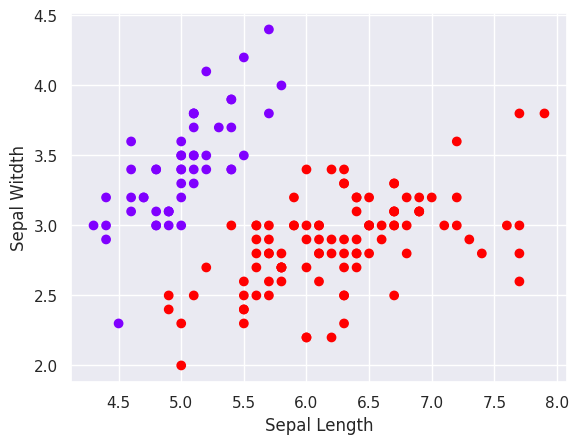

In [16]:
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c=clusters_scaled['cluster_preds'], cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Witdth')
plt.show();

## Take Advantage of the Elbow Method

### WCSS

In [17]:
wcss = []
cls_num = 10

for i in range(1, cls_num):
    kmeans_test = KMeans(i)
    kmeans_test.fit(x_scaled)
    wcss.append(kmeans_test.inertia_)

wcss

/home/alexender/Desktop/Projects/My_Projects/envs/Data_Science/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alexender/Desktop/Projects/My_Projects/envs/Data_Science/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alexender/Desktop/Projects/My_Projects/envs/Data_Science/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/alexender/Desktop/Projects/My_Projects/envs/Data_Science/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The de

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.42714544645855,
 91.06677122728536,
 82.70665073626617,
 72.41144476219873,
 62.853198739591555,
 54.97948558284678]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

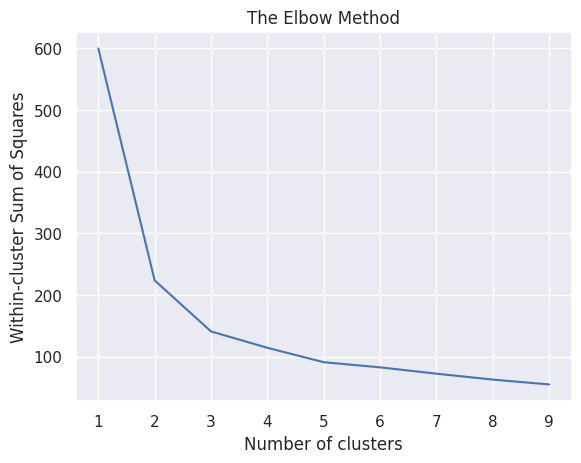

In [18]:
plt.plot(range(1,cls_num), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

How many clusters are there?

## Understanding the Elbow Curve

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 2 clusters

Start by separating the standardized data into 2 clusters (you've already done that!)

In [19]:
kmeans_2 = KMeans(2, n_init='auto')
kmeans_2.fit(x_scaled)

clusters_scaled_2 = data.copy()
clusters_scaled_2['cluster_preds'] = kmeans_2.fit_predict(x_scaled)
clusters_scaled_2.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_preds
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Constructing a plot 

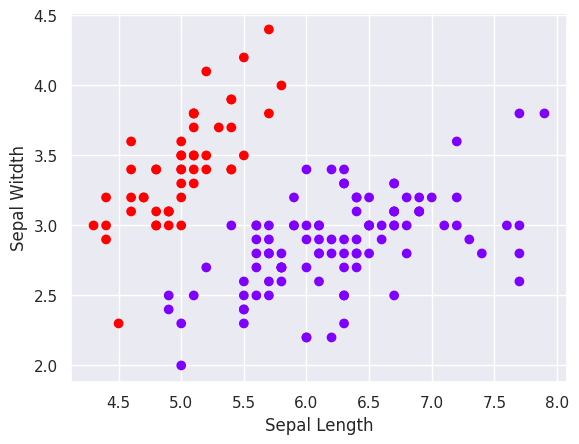

In [22]:
plt.scatter(clusters_scaled_2['sepal_length'], clusters_scaled_2['sepal_width'], c=clusters_scaled_2['cluster_preds'], cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Witdth')
plt.show();

## 3 clusters
Redo the same for 3 and 5 clusters

In [23]:
kmeans_3 = KMeans(3, n_init='auto')
kmeans_3.fit(x_scaled)

clusters_scaled_3 = data.copy()
clusters_scaled_3['cluster_preds'] = kmeans_3.fit_predict(x_scaled)
clusters_scaled_3.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_preds
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


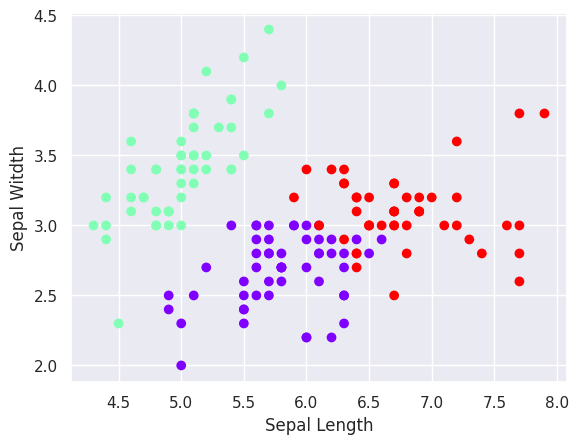

In [24]:
plt.scatter(clusters_scaled_3['sepal_length'], clusters_scaled_3['sepal_width'], c=clusters_scaled_3['cluster_preds'], cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Witdth')
plt.show();

## 5 clusters

In [25]:
kmeans_5 = KMeans(5, n_init='auto')
kmeans_5.fit(x_scaled)

clusters_scaled_5 = data.copy()
clusters_scaled_5['cluster_preds'] = kmeans_5.fit_predict(x_scaled)
clusters_scaled_5.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_preds
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


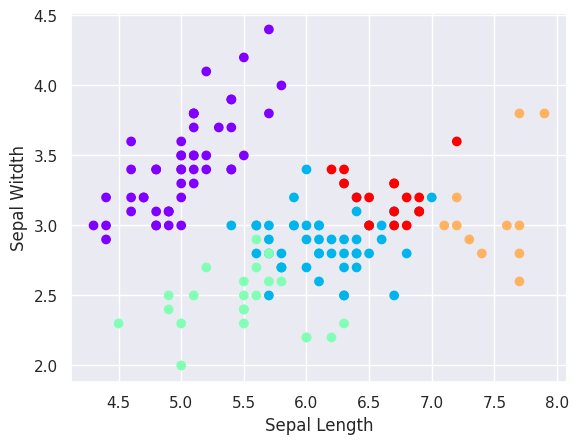

In [26]:
plt.scatter(clusters_scaled_5['sepal_length'], clusters_scaled_5['sepal_width'], c=clusters_scaled_5['cluster_preds'], cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Witdth')
plt.show();

## Compare your solutions to the original iris dataset

The original (full) iris data is located in <i>iris_with_answers.csv</i>. Load the csv, plot the data and compare it with your solution. 

Obviously there are only 3 types, because that's the original (truthful) iris dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [27]:
# Iris_dataset
real_data = pd.read_csv("https://docs.google.com/spreadsheets/d/18Z_NTeqo5xoAVk-FeMwT98f1ahOGGPf5a8u7ym8pd6s/export?gid=1460468805&format=csv")
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [29]:
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

In [30]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Scatter plots (which we will use for comparison)

#### 'Real data'

Looking at the first graph it seems like the clustering solution is much more intertwined than what we imagined (and what we found before)

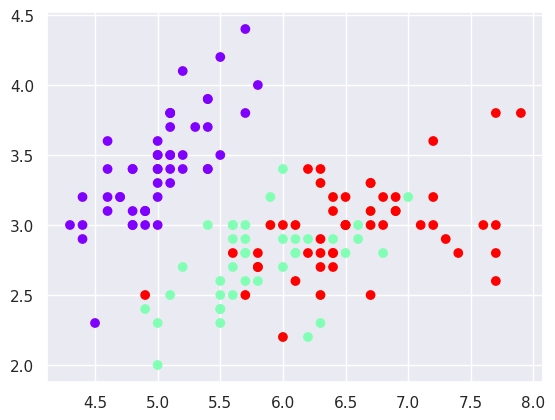

In [32]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')

Examining the other scatter plot (petal length vs petal width), we see that in fact the features which actually make the species different are petals and NOT sepals!

Note that 'real data' is the data observed in the real world (biological data)

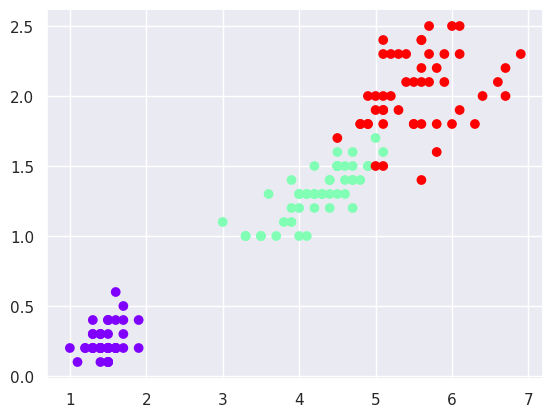

In [33]:
plt.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')

#### Our clustering solution data

It seems that our solution takes into account mainly the sepal features

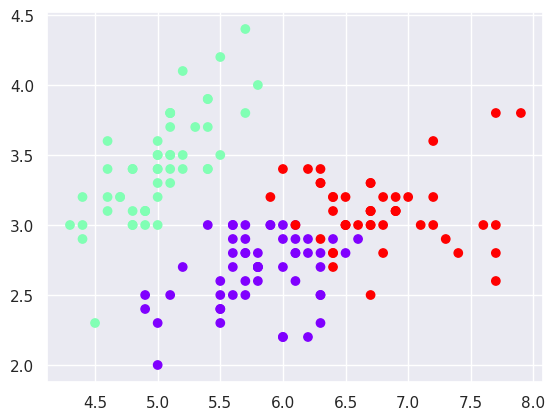

In [35]:
plt.scatter(clusters_scaled_3['sepal_length'], clusters_scaled_3['sepal_width'], c= clusters_scaled_3['cluster_preds'], cmap = 'rainbow')

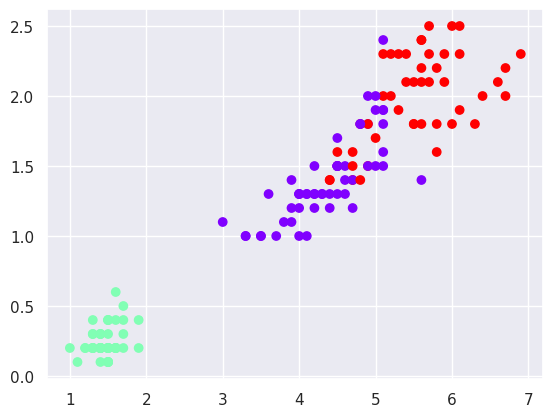

In [36]:
plt.scatter(clusters_scaled_3['petal_length'], clusters_scaled_3['petal_width'], c= clusters_scaled_3['cluster_preds'], cmap = 'rainbow')